In [14]:
import keras
import pickle
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
file = open('lstm_dataset_test', 'rb')
x_test, y_test = pickle.load(file)
file.close()

In [16]:
model = keras.models.load_model('modelo_9437_9140_9157.h5')
y_pred = model.predict(x_test)

6/6 [==============================] - 1s 83ms/step


In [9]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Parameters
    ----------
    cm : numpy ndarray with 
        matrix with the confusion matrix values returned from scipy
    normalize : Boolen
        wether cm is normalized or not
    title: string
        plot title text
    cmap: string
        matplotlib plt.cm cmap options
        
    Returns
    -------
        None
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[87  8]
 [ 8 87]]
regular 	 0.9157894736842105 %
blink 	 0.9157894736842105 %


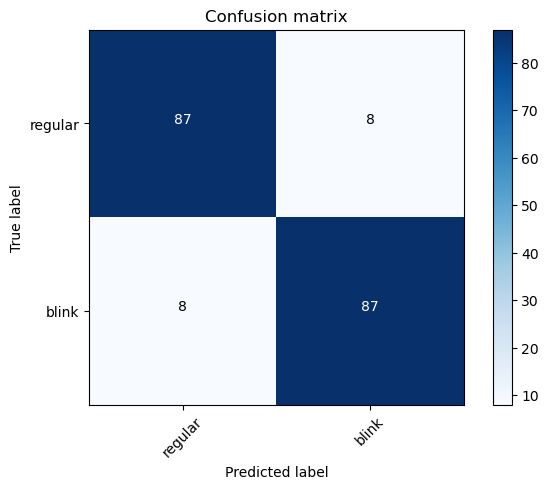

In [17]:
labels_resultado = ['regular', 'blink']
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm, labels_resultado)
for i in range(2):
    print(f'{labels_resultado[i]} \t {cm[i,i]/cm[i,:].sum()} %')

In [18]:
Tp = cm[1,1]
Tn = cm[0,0]
Fp = cm[0,1]
Fn = cm[1,0]
prec = (Tp)/(Tp + Fp)
rec = (Tp)/(Tp + Fn)

In [19]:
print(f'Accuracy  =  {100*(Tp + Tn)/(Tp+Tn+Fp+Fn)} %')
print(f'Precision =  {100*(Tp)/(Tp + Fp)} %')
print(f'Recal     =  {100*(Tp)/(Tp + Fn)} %')
print(f'F1 Rate   =  {100*2*(prec*rec)/(prec + rec)}')

Accuracy  =  91.57894736842105%
Precision =  91.57894736842105 %
Recal     =  91.57894736842105 %
F1 Rate   =  91.57894736842104


In [20]:
report = classification_report(y_test, y_pred.round(), digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9158    0.9158    0.9158        95
         1.0     0.9158    0.9158    0.9158        95

    accuracy                         0.9158       190
   macro avg     0.9158    0.9158    0.9158       190
weighted avg     0.9158    0.9158    0.9158       190

